<a href="https://colab.research.google.com/github/JihunSKKU/GNN-Tutorial/blob/master/KSIAM_GNN_tutorial_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch & Torch Geometic Tutoiral

Reference
-   https://tutorials.pytorch.kr/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py
- https://pytorch-geometric.readthedocs.io/en/latest/

## Pytorch Tutorial

#### 텐서(Tensor)
텐서(Tensor): 배열(array)이나 행렬(matrix)과 매우 유사한 특수한 자료구조, GPU나 다른 연산 가속을 위한 하드웨어에서 실행 가능.
- 배열(array)이나 행렬(matrix)과 매우 유사한 특수한 자료구조
- GPU나 다른 연산 가속을 위한 하드웨어서 실행 가능
- Numpy의 ndarray와 매우 유사함.

In [ ]:
# Install required packages.
import os
import torch
import numpy as np

os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Helper function for visualization.
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt


def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()


def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    h = h.detach().cpu().numpy()
    plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.show()

1.13.1+cu116
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 36.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 6.5 MB/s eta 0:00:00


#### [1] 텐서 초기화
[1-1] 데이터로부터 직접 생성하기
이때, 텐서의 자료형(data type)은 데이터로부터 자동으로 유추하여 생성합니다.

In [ ]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
print(x_data.type())

torch.LongTensor


In [ ]:
data2 = [[1.2, 2.6], [3.4, 4.2]]
x_data2 = torch.tensor(data2)
print(x_data2.type())

torch.FloatTensor


[1-2] NumPy 배열로부터 생성하기

텐서는 NumPy 배열로 생성할 수 있습니다. (그 반대도 가능합니다.)


In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print("data", data)
print(x_np)

data [[1, 2], [3, 4]]
tensor([[1, 2],
        [3, 4]])


In [ ]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


[1-3] 다른 텐서로부터 생성하기

명시적으로 재정의(override)하지 않는다면, 인자로 주어진 텐서의 속성(모양(shape), 자료형(datatype))을 유지합니다.



In [ ]:
print(f"Original Tensor: \n {x_data} \n")

x_ones = torch.ones_like(x_data) # x_data의 속성을 유지합니다.
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # x_data의 속성을 덮어씁니다.
print(f"Random Tensor: \n {x_rand} \n")


Original Tensor: 
 tensor([[1, 2],
        [3, 4]]) 

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.4425, 0.3742],
        [0.9628, 0.1749]]) 



[1-4] 무작위(random) 또는 상수(constant) 값을 사용하기

shape 은 텐서의 차원(dimension)을 나타내는 튜플(tuple)로, 아래 함수들에서는 출력 텐서의 차원을 결정합니다.

In [ ]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")


Random Tensor: 
 tensor([[0.6314, 0.0131, 0.5637],
        [0.2425, 0.9913, 0.0754]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


#### [2] 텐서의 속성(Attribute)


텐서의 속성은 텐서의 모양(shape), 자료형(datatype) 및 어느 장치에 저장되는지를 나타냅니다.

In [ ]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")


Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


#### [3] 텐서 연산(Operation)

전치(transposing), 인덱싱(indexing), 슬라이싱(slicing), 수학 계산, 선형 대수, 임의 샘플링(random sampling) 등, 100가지 이상의 텐서 연산이 존재합니다.

각 연산들은 (일반적으로 CPU보다 빠른) GPU에서 실행할 수 있습니다. 

 **런타임 -> 런타임 유형 변경 -> GPU**
 
 **런타임 변경 후, 런타임-> 모두 실행**

[3-1] NumPy식의 표준 인덱싱과 슬라이싱

In [ ]:
tensor = torch.ones(4, 4)
print("4x4 tensor 값을 1로 초기화 \n", tensor)

tensor[:,1] = 0
print("\n 모든 행의 1열 값을 0으로 바꾸기\n", tensor)


tensor[0,:] = -1
print("\n 0열의 모든 행 값을 -1로 바꾸기\n", tensor)

4x4 tensor 값을 1로 초기화 
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

 모든 행의 1열 값을 0으로 바꾸기
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

 0열의 모든 행 값을 -1로 바꾸기
 tensor([[-1., -1., -1., -1.],
        [ 1.,  0.,  1.,  1.],
        [ 1.,  0.,  1.,  1.],
        [ 1.,  0.,  1.,  1.]])


[3-2] 텐서 합치기 

torch.cat 을 사용하여 주어진 차원에 따라 일련의 텐서를 연결할 수 있습니다. 

In [ ]:
print(tensor)
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print("\n torch.cat\n", t1)

t2 = torch.stack([tensor, tensor, tensor], dim=1)
print("\n torch.stack\n", t2)

tensor([[-1., -1., -1., -1.],
        [ 1.,  0.,  1.,  1.],
        [ 1.,  0.,  1.,  1.],
        [ 1.,  0.,  1.,  1.]])

 torch.cat
 tensor([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [ 1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.],
        [ 1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.],
        [ 1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.]])

 torch.stack
 tensor([[[-1., -1., -1., -1.],
         [-1., -1., -1., -1.],
         [-1., -1., -1., -1.]],

        [[ 1.,  0.,  1.,  1.],
         [ 1.,  0.,  1.,  1.],
         [ 1.,  0.,  1.,  1.]],

        [[ 1.,  0.,  1.,  1.],
         [ 1.,  0.,  1.,  1.],
         [ 1.,  0.,  1.,  1.]],

        [[ 1.,  0.,  1.,  1.],
         [ 1.,  0.,  1.,  1.],
         [ 1.,  0.,  1.,  1.]]])


In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)

t2 = torch.stack([tensor, tensor, tensor], dim=1)


[3-3] 텐서 곱하기

a.  요소별 곱(element-wise product)을 계산합니다

In [ ]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0

print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# 다른 문법:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


b. 두 텐서 간의 행렬 곱(matrix multiplication)을 계산합니다


In [ ]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# 다른 문법:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")


tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


[3-4] 바꿔치기(in-place) 연산 

_ 접미사를 갖는 연산들은 바꿔치기(in-place) 연산입니다. 

예를 들어: x.copy_() 나 x.t_() 는 x 를 변경합니다.


바꿔치기 연산은 메모리를 일부 절약하지만, 기록(history)이 즉시 삭제되어 도함수(derivative) 계산에 문제가 발생할 수 있습니다. 

따라서, 사용을 권장하지 않습니다.

In [ ]:
print("바꿔치기 연산 전 \n", tensor, "\n")
tensor.add_(5)
print("바꿔치기 연산 후 \n", tensor)

바꿔치기 연산 전 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

바꿔치기 연산 후 
 tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


[3-5] squeeze 연산

tensor dimension 중 size 1인 dimension을 제거합니다.


예를 들어, (A x 1 x B x 1 x C) shape을 가진 텐서에 squeeze 연산을 적용하면,
(A x B x C) shape만 남게 됩니다.



dimension을 지정해주면, 특정 dimension에만 적용가능합니다.

In [ ]:
x = torch.zeros(2, 1, 2, 1, 2)
print(" squeeze 연산 전 : \n", x.shape)

y = torch.squeeze(x)
print("\n squeeze 연산 후 : \n", y.shape)

z = torch.squeeze(x, dim=1)
print("\n 특정 dimension에만 squeeze 연산 후 : \n", z.shape)

 squeeze 연산 전 : 
 torch.Size([2, 1, 2, 1, 2])

 squeeze 연산 후 : 
 torch.Size([2, 2, 2])

 특정 dimension에만 squeeze 연산 후 : 
 torch.Size([2, 2, 1, 2])


[3-6] unsqueeze 연산

특정 위치에 크기가 1인 텐서를 생성합니다.

In [ ]:
x = torch.tensor([1, 2, 3, 4])
print(" unsqueeze 연산 전 : \n", x.shape)


y = torch.unsqueeze(x, dim=0)
print("\n dimension 0에 unsqueeze 연산 후 : \n", y.shape)


z = torch.unsqueeze(x, dim=1)
print("\n dimension 1에 unsqueeze 연산 후 : \n", z.shape)

 unsqueeze 연산 전 : 
 torch.Size([4])

 dimension 0에 unsqueeze 연산 후 : 
 torch.Size([1, 4])

 dimension 1에 unsqueeze 연산 후 : 
 torch.Size([4, 1])


In [ ]:
x = torch.tensor([1, 2, 3, 4])

y = torch.unsqueeze(x, dim=0)

z = torch.unsqueeze(x, dim=1)

## Introduction: 그래프 인공 신경망 (Graph Neural Networks, GNNs)

그래프 인공 신경망은 최근 그래프 데이터를 처리하기 위해 많이 사용되고 있는 인공 신경망이며 Neural message passing scheme을 기반으로 이루어져 있습니다. 

그래프 ${G} = \left(V, E \right)$의 모든 노드 $v \in V$에 대해 노드의 hidden representation이 $\mathbf{h}_v^{(\ell)}$일 때, 그래프 인공 신경망은 수학적으로 아래와 같이 표현될 수 있습니다.


$$
\mathbf{h}_v^{(\ell + 1)} = f^{(\ell + 1)}_{\theta} \left( \mathbf{h}_v^{(\ell)}, \left\{ \mathbf{h}_w^{(\ell)} : w \in {N}(v) \right\} \right),
$$
이 때, $N_v$는 노드 $v$의 이웃들입니다. 즉, Message passing scheme은 이웃노드들로부터 정보를 모으는 신경망이라고 생각할 수 있습니다.

####[1] 그래프 데이터 표현
그래프 데이터를 어떻게 표현할 수 있는지 torch geometric 모듈을 통해 알아보겠습니다.

주어진 그래프 $G=(V,E)$에서 모든 노드에 대해 노드 피쳐가 $\mathbf{x}_v$가 존재할 경우 torch geometric module에서 데이터들은 아래와 같이 매핑됩니다.

- data.x : 노드 피쳐 행렬(Node feature matrix) [num_nodes, feat_dim]
- data.edge_index : 그래프 엣지(Edge) [2, num_edges] (Edge index는 위와 같이 이는 COO format (coordinate format)으로 표현됩니다. COO format은 Adjacency matrix $\mathbf{A}$가 sparse matrix일 때, 효율적으로 관리하기 위해서 많이 사용하는 표현방식입니다.)
- data.y : 노드의 레이블(Node label) [num_nodes, *]

[1-1] Example 1

인접행렬 $\mathbf{A}$가 $\mathbf{A}=\begin{bmatrix} 0&1&0 \\ 1 & 0 & 1 \\ 0 & 1& 0   \end{bmatrix}$ 값을 가지고 $\mathbf{X} = \begin{bmatrix} -1 \\ 0 \\ 1   \end{bmatrix}$ 일 때의 그래프.

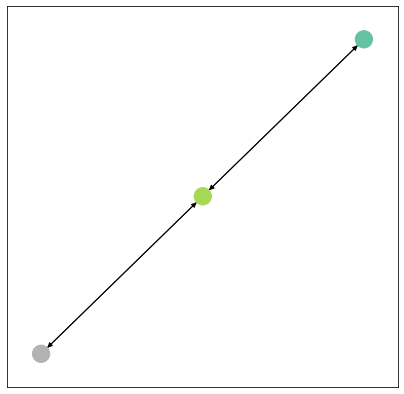

Data(x=[3, 1], edge_index=[2, 4])


In [ ]:
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx

edge_index = torch.tensor([[0,1,1,2],
                           [1,0,2,1]], dtype=torch.long)
x = torch.tensor([[-1],[0],[1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)
G = to_networkx(data)
visualize_graph(G, color=x)
print(data)

[1-1] Example 2

인접행렬 $\mathbf{A}$가 $\mathbf{A}=\begin{bmatrix} 0&1&1 \\ 1 & 0 & 1 \\ 1 & 1& 0   \end{bmatrix}$ 값을 가지고 $\mathbf{X} = \begin{bmatrix} -1 \\ 0 \\ 1   \end{bmatrix}$ 일 때의 그래프.

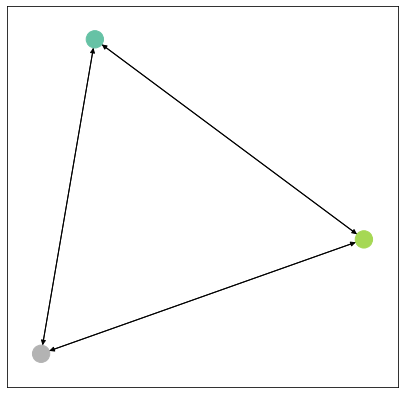

Data(x=[3, 1], edge_index=[2, 6])


In [ ]:
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx

edge_index = torch.tensor([[0,1,0,2,1,2],
                           [1,0,2,0,2,1]], dtype=torch.long)
x = torch.tensor([[-1],[0],[1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)
G = to_networkx(data)
visualize_graph(G, color=x)
print(data)

####[2] 벤치마크 데이터 사용

그래프 인공 신경망의 효과를 보기 위해서 단순하면서 많이 사용되는 KararateClub dataset을 이용해보도록 하겠습니다. 

[2-1] KarateClub dataset 데이터 로드

In [ ]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
data = dataset[0]

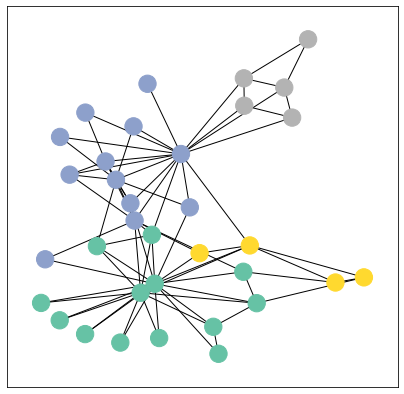

In [ ]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize_graph(G, color=data.y)

[2-2] 데이터셋 통계

In [ ]:
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


In [ ]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Number of training nodes: 4
Training node label rate: 0.12
Has isolated nodes: False
Has self-loops: False
Is undirected: True


#### [3] 그래프 합성곱 신경망 (Graph Convolutional Networks)



그래프 합성곱 신경망(Graph Convolutional Networks, GCN)은 GNN의 가장 대표적인 인공 신경망 중 하나입니다. torch_geometric 모듈을 활용하여 그래프 합성곱 신경망을 학습하는 방법에 대해 알아보겠습니다.

- GCN layer
$$\mathbf{h}^{(l)}_v = \sum_{u \in N(v)} \frac{1}{\sqrt{\text{deg}(v)\text{deg}(u)}}\mathbf{W}^{(l)}\mathbf{h}^{(l-1)}_u $$



In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(dataset.num_features, 16)
        self.conv2 = GCNConv(16, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 16)
  (conv2): GCNConv(16, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


[3-1] 그래프 인공 신경망을 이용하기전 Hidden embedding Visuazliation



In [ ]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')


Embedding shape: [34, 2]


[3-2] 그래프 인공 신경망 학습


<IPython.core.display.Javascript object>

Epoch 1 : train loss 1.4494013786315918
Epoch 11 : train loss 1.1737178564071655
Epoch 21 : train loss 0.9307335615158081
Epoch 31 : train loss 0.8064817786216736
Epoch 41 : train loss 0.7555451393127441
Epoch 51 : train loss 0.7332151532173157
Epoch 61 : train loss 0.7201418280601501
Epoch 71 : train loss 0.7051874995231628
Epoch 81 : train loss 0.6733239889144897
Epoch 91 : train loss 0.618698239326477
Epoch 101 : train loss 0.5608822107315063


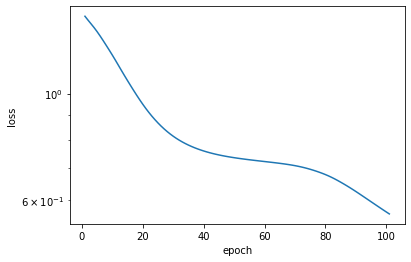

In [ ]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None, legend=None, figsize=(3.5, 2.5)):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        plt.semilogy(x2_vals, y2_vals, linestyle=':')
        plt.legend(legend)

losses = list()
for epoch in range(101):
    loss, h = train(data)
    losses.append(loss.item())
    if epoch % 10 == 0:
      print(f"Epoch {epoch+1} : train loss {loss}")
semilogy(range(1, 102), losses, 'epoch', 'loss')

[3-3] 그래프 인공 신경망을 이용한 후 Hidden embedding Visuazliation

In [ ]:
for epoch in range(101):
    loss, h = train(data)

## Node Classification
위에서 다룬 기본적인 GCN 모델을 기반으로 Node Classification Task를 진행합니다.
 

In [ ]:
from sklearn.manifold import TSNE

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

[1] 데이터 로드

Node Classification task에서 가장 많이 사용되는 Cora dataset을 로드합니다.

In [ ]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())

print()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.

print()
print(data)
print('===========================================================================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Has isolated nodes: False
Has self-loops: False
Is undirected: True


Processing...
Done!


#### [2] MLP (Multi-Layer Perceptrons)

MLP는 딥러닝에서 가장 기본적으로 사용되는 모델 중 하나입니다.

- MLP Layer
 $$\mathbf{h}^{(l)} = \mathbf{W}\mathbf{h}^{(l-1)}$$

In [ ]:
import torch
from torch.nn import Linear
import torch.nn.functional as F


class MLP(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(12345)
        self.lin1 = Linear(dataset.num_features, hidden_channels)
        self.lin2 = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x):
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        return x

model = MLP(hidden_channels=16)
print(model)

MLP(
  (lin1): Linear(in_features=1433, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=7, bias=True)
)


[2-1] MLP 학습

Cora 데이터셋에 MLP를 학습시켜 GCN의 성능과 비교해봅시다. 이는 그래프 구조를 학습할 때 고려하는 것이 얼마나 중요한지 알 수 있게 해줍니다.

<IPython.core.display.Javascript object>

Epoch: 050, Loss: 1.0563
Epoch: 100, Loss: 0.5350
Epoch: 150, Loss: 0.4212
Epoch: 200, Loss: 0.3810


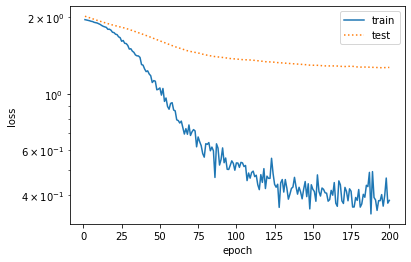

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = MLP(hidden_channels=16)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)  # Define optimizer.

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(data.x)
      test_loss = criterion(out[data.test_mask], data.y[data.test_mask])
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc, test_loss

mlp_train_losses, mlp_test_losses = list(), list()
for epoch in range(1, 201):
    loss = train()
    _, test_loss = test()
    mlp_train_losses.append(loss.item())
    mlp_test_losses.append(test_loss.item())
    if epoch %50 == 0:
      print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
semilogy(range(1, 201), mlp_train_losses, 'epoch', 'loss', range(1, 201), mlp_test_losses, ['train', 'test'])

In [ ]:
test_acc, _ = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.5900


[2-2] MLP 학습된 hidden representation tSNE를 통한 visualization




/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


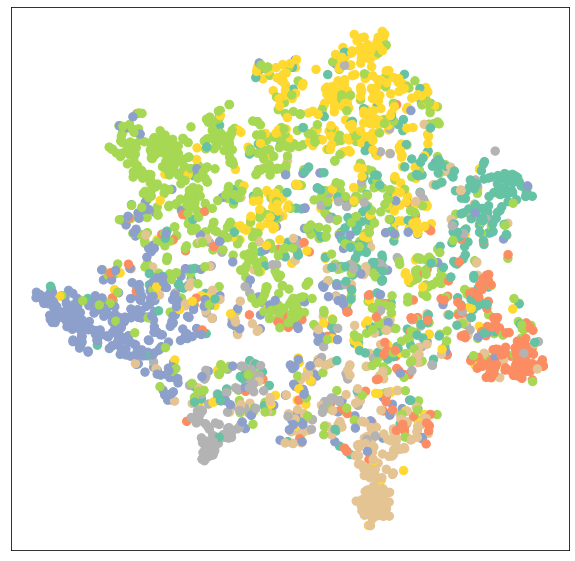

In [ ]:
out = model(data.x)
visualize(out, color=data.y)

#### [3] 그래프 합성곱 신경망 (Graph Convolutional Networks)

In [ ]:
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(dataset.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GCN(hidden_channels=16)
print(model)

GCN(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
)


[3-1] GCN 학습 이전 hidden representation tSNE를 통한 visualization




/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


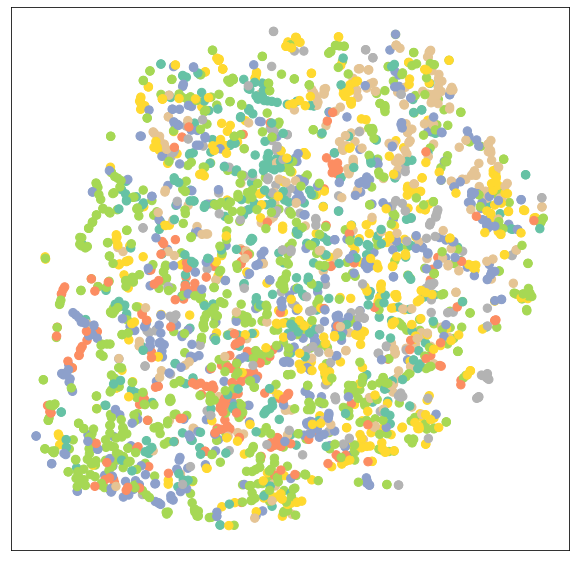

In [ ]:
model = GCN(hidden_channels=16)
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

[3-2] GCN 학습

<IPython.core.display.Javascript object>

Epoch: 050, Loss: 1.1296
Epoch: 100, Loss: 0.5799
Epoch: 150, Loss: 0.4069
Epoch: 200, Loss: 0.3045


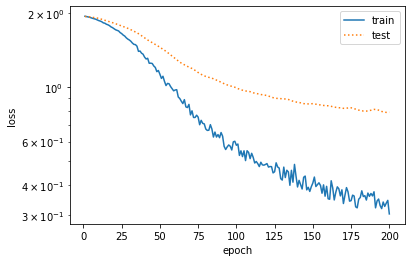

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x, data.edge_index)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(data.x, data.edge_index)
      test_loss = criterion(out[data.test_mask], data.y[data.test_mask])
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc, test_loss

gcn_train_losses, gcn_test_losses = list(), list()
for epoch in range(1, 201):
    loss = train()
    _, test_loss = test()
    gcn_train_losses.append(loss.item())
    gcn_test_losses.append(test_loss.item())
    if epoch % 50 == 0:
      print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
semilogy(range(1, 201), gcn_train_losses, 'epoch', 'loss', range(1, 201), gcn_test_losses, ['train', 'test'])
  

In [ ]:
test_acc, _ = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.8020


[3-3] GCN 학습 이후 hidden representation tSNE를 통한 visualization




/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


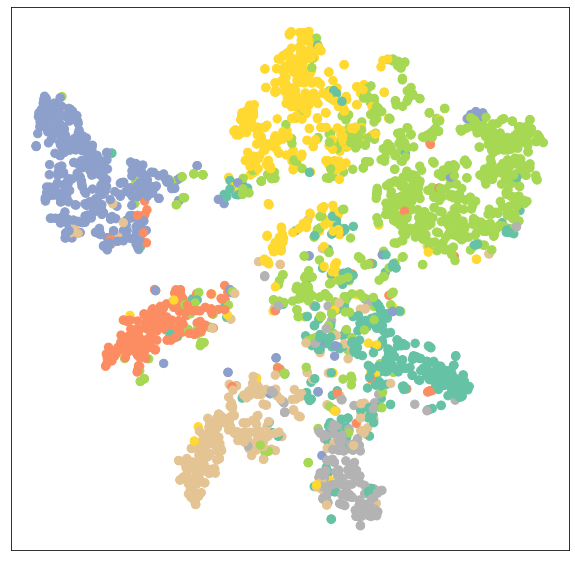

In [ ]:
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

[3-4] GCN vs MLP

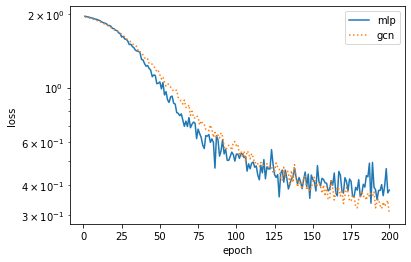

In [ ]:
semilogy(range(1, 201), mlp_train_losses, 'epoch', 'loss', range(1, 201), gcn_train_losses, ['mlp', 'gcn'])

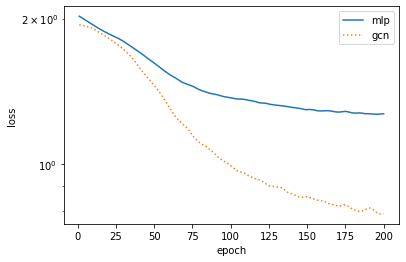

In [ ]:
semilogy(range(1, 201), mlp_test_losses, 'epoch', 'loss', range(1, 201), gcn_test_losses, ['mlp', 'gcn'])

##Graph Classification

Graph Classification은 주어진 그래프의 label을 분류하는 task입니다. Graph Classification은 위에 다뤘던 Node Classification과 다르게 여러개의 그래프를 학습시킵니다. 

####[1] 데이터 로드

Graph Classification task에서 가장 많이 사용되는 TUDataset dataset을 로드합니다.

In [ ]:
import torch
from torch_geometric.datasets import TUDataset

dataset = TUDataset(root='data/TUDataset', name='MUTAG')

print()
print(f'Dataset: {dataset}:')
print('====================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.

print()
print(data)
print('=============================================================')

# Gather some statistics about the first graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


Dataset: MUTAG(188):
Number of graphs: 188
Number of features: 7
Number of classes: 2

Data(edge_index=[2, 38], x=[17, 7], edge_attr=[38, 4], y=[1])
Number of nodes: 17
Number of edges: 38
Average node degree: 2.24
Has isolated nodes: False
Has self-loops: False
Is undirected: True


Extracting data/TUDataset/MUTAG/MUTAG.zip
Processing...
Done!


In [ ]:
torch.manual_seed(12345)
dataset = dataset.shuffle()

train_dataset = dataset[:150]
test_dataset = dataset[150:]

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

Number of training graphs: 150
Number of test graphs: 38



####[2] Mini-Batching

Graph Classification에서 여러개의 그래프를 효율적으로 학습시키기 위해 Mini-batching 방식을 이용하여 학습합니다. 여러개의 그래프를 한번에 학습하기 위해 아래그림과 같이 disjoint한 그래프를 한 그래프로 학습하는 방식을 취합니다.

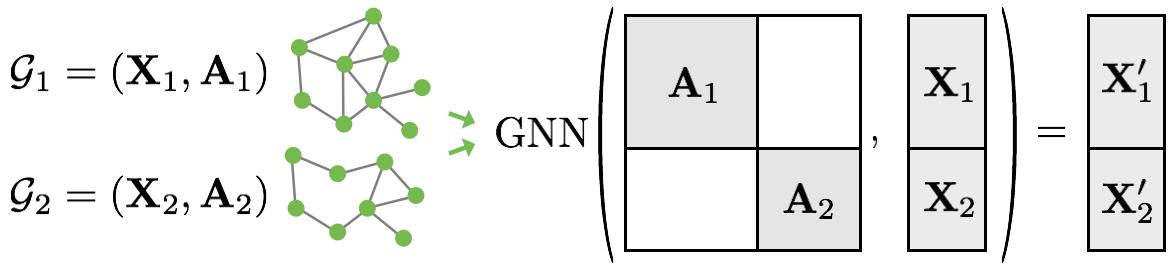

In [ ]:
from torch_geometric.loader import DataLoader

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

for step, data in enumerate(train_loader):
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {data.num_graphs}')
    print(data)
    print()

Step 1:
Number of graphs in the current batch: 64
DataBatch(edge_index=[2, 2636], x=[1188, 7], edge_attr=[2636, 4], y=[64], batch=[1188], ptr=[65])

Step 2:
Number of graphs in the current batch: 64
DataBatch(edge_index=[2, 2506], x=[1139, 7], edge_attr=[2506, 4], y=[64], batch=[1139], ptr=[65])

Step 3:
Number of graphs in the current batch: 22
DataBatch(edge_index=[2, 852], x=[387, 7], edge_attr=[852, 4], y=[22], batch=[387], ptr=[23])



In [ ]:
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.lin = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index, batch):
        # 1. Obtain node embeddings 
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = self.conv3(x, edge_index)

        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

        # 3. Apply a final classifier
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)
        
        return x

model = GCN(hidden_channels=64)
print(model)

GCN(
  (conv1): GCNConv(7, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (lin): Linear(in_features=64, out_features=2, bias=True)
)


####[3] GCN Training


In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(hidden_channels=64)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

def train():
    model.train()

    for data in train_loader:  # Iterate in batches over the training dataset.
         out = model(data.x, data.edge_index, data.batch)  # Perform a single forward pass.
         loss = criterion(out, data.y)  # Compute the loss.
         loss.backward()  # Derive gradients.
         optimizer.step()  # Update parameters based on gradients.
         optimizer.zero_grad()  # Clear gradients.

def test(loader):
     model.eval()

     correct = 0
     for data in loader:  # Iterate in batches over the training/test dataset.
         out = model(data.x, data.edge_index, data.batch)  
         pred = out.argmax(dim=1)  # Use the class with highest probability.
         correct += int((pred == data.y).sum())  # Check against ground-truth labels.
     return correct / len(loader.dataset)  # Derive ratio of correct predictions.


for epoch in range(1, 171):
    train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Train Acc: 0.6467, Test Acc: 0.7368
Epoch: 002, Train Acc: 0.6467, Test Acc: 0.7368
Epoch: 003, Train Acc: 0.6467, Test Acc: 0.7368
Epoch: 004, Train Acc: 0.6467, Test Acc: 0.7368
Epoch: 005, Train Acc: 0.6467, Test Acc: 0.7368
Epoch: 006, Train Acc: 0.6533, Test Acc: 0.7368
Epoch: 007, Train Acc: 0.7467, Test Acc: 0.7632
Epoch: 008, Train Acc: 0.7267, Test Acc: 0.7632
Epoch: 009, Train Acc: 0.7200, Test Acc: 0.7632
Epoch: 010, Train Acc: 0.7133, Test Acc: 0.7895
Epoch: 011, Train Acc: 0.7200, Test Acc: 0.7632
Epoch: 012, Train Acc: 0.7200, Test Acc: 0.7895
Epoch: 013, Train Acc: 0.7200, Test Acc: 0.7895
Epoch: 014, Train Acc: 0.7133, Test Acc: 0.8421
Epoch: 015, Train Acc: 0.7133, Test Acc: 0.8421
Epoch: 016, Train Acc: 0.7533, Test Acc: 0.7368
Epoch: 017, Train Acc: 0.7400, Test Acc: 0.7632
Epoch: 018, Train Acc: 0.7133, Test Acc: 0.8421
Epoch: 019, Train Acc: 0.7400, Test Acc: 0.7895
Epoch: 020, Train Acc: 0.7533, Test Acc: 0.7368
Epoch: 021, Train Acc: 0.7467, Test Acc: